In [1]:

from data.data_preparation import prepare_data
import time

start = time.time()
prepare_data()
end = time.time() - start
print('Temps pour la préparation des données :', end)



Air quality data of bj prepared ！
Air quality data of ld prepared ！
Meteo data of bj prepared ！
Meteo data of ld prepared ！
Data splitted into training and test sets !
Temps pour la préparation des données : 363.1708400249481


### Sanity check of the prepared data :
##### We plot the matrices to check where the data is missing

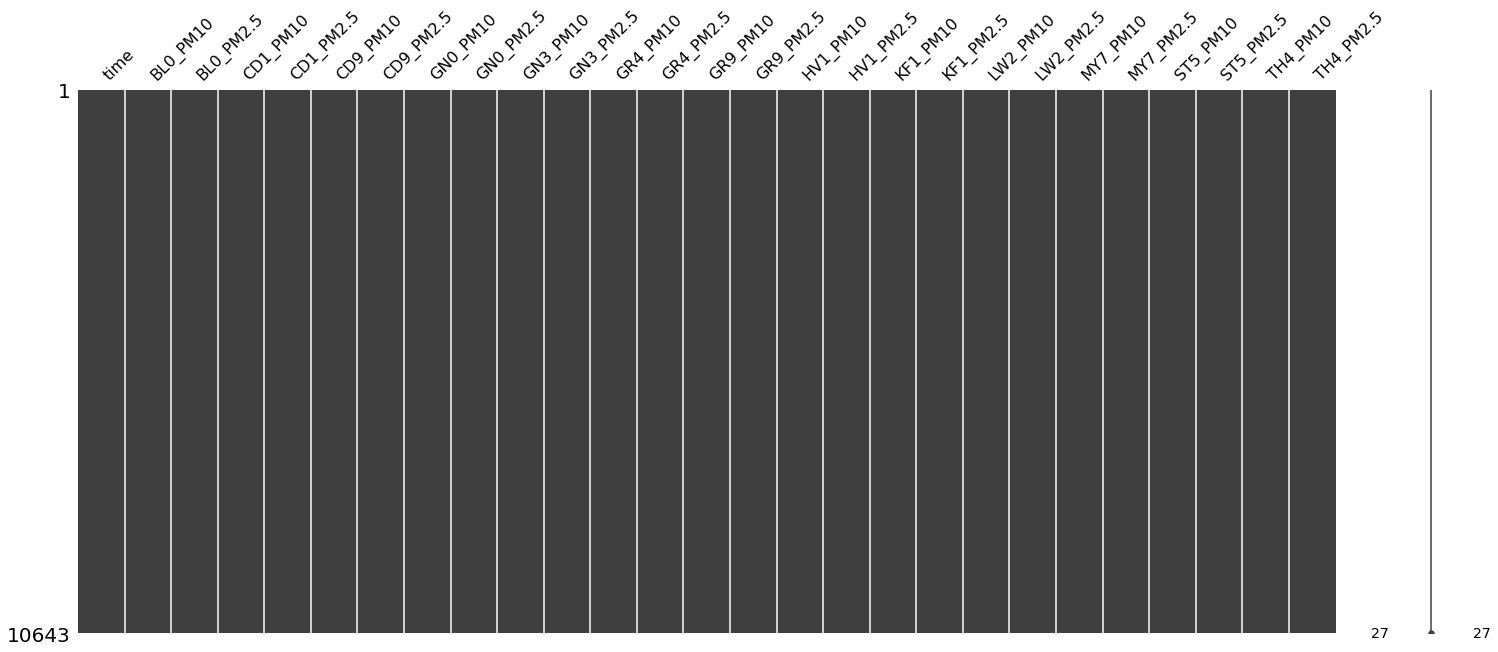

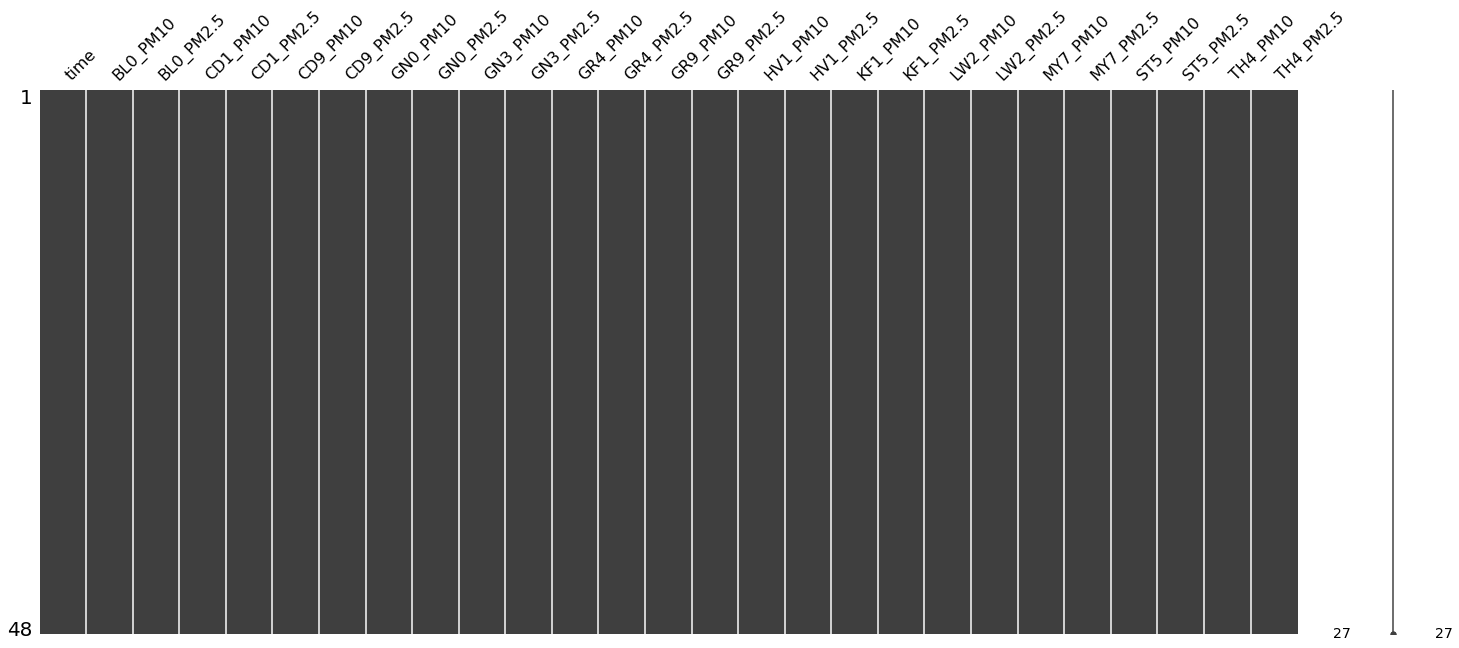

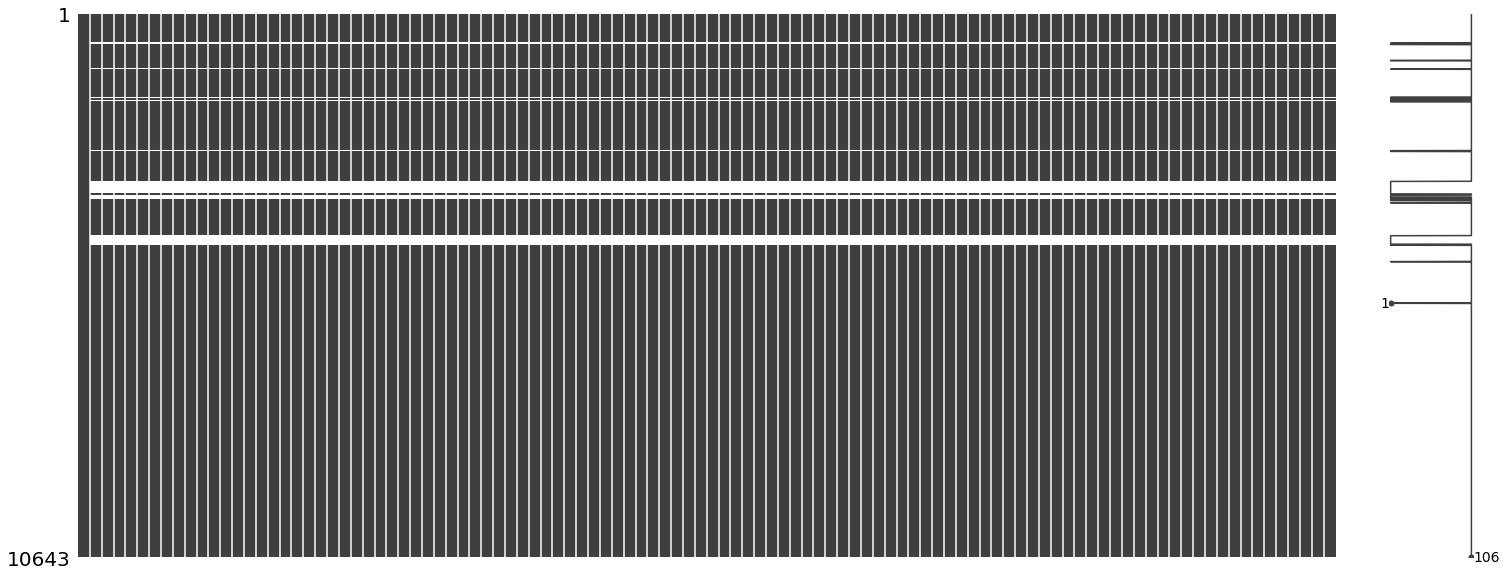

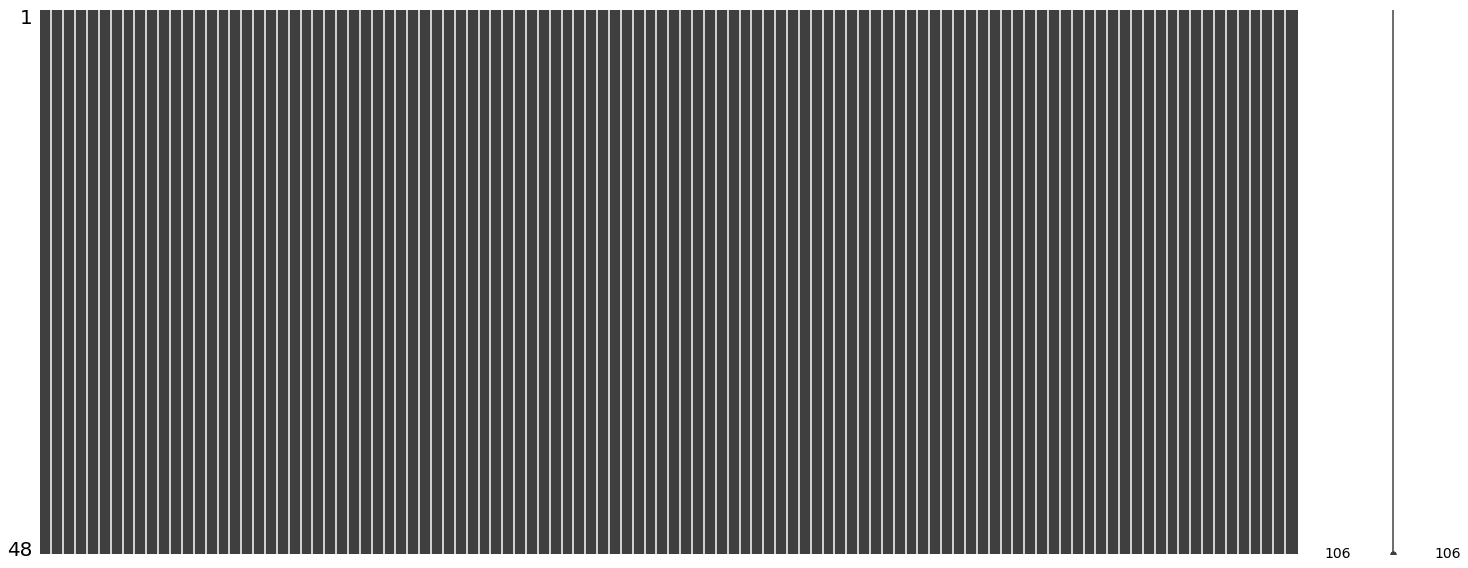

In [2]:
import pandas as pd
import missingno as mso

ld_aq_train_data = pd.read_csv('./prepared_data/ld_aq_train_data.csv')
ld_aq_test_data = pd.read_csv('./prepared_data/ld_aq_test_data.csv')
bj_aq_train_data = pd.read_csv('./prepared_data/bj_aq_train_data.csv')
bj_aq_test_data = pd.read_csv('./prepared_data/bj_aq_test_data.csv')

mso.matrix(ld_aq_train_data)
mso.matrix(ld_aq_test_data)
mso.matrix(bj_aq_train_data)
mso.matrix(bj_aq_test_data)

In [1]:
from dummy_model.dummy_model import predict_dummy

predict_dummy()

Predictions of dummy method results :
PM 2.5 RMSE in London : 5.02876965376741
PM 10 RMSE in London : 9.841977487421524
PM 2.5 RMSE in Beijing : 33.16772024063834
PM 10 RMSE in Beijing : 38.322853268318134
O3 RMSE in Beijing : 37.908385847992605


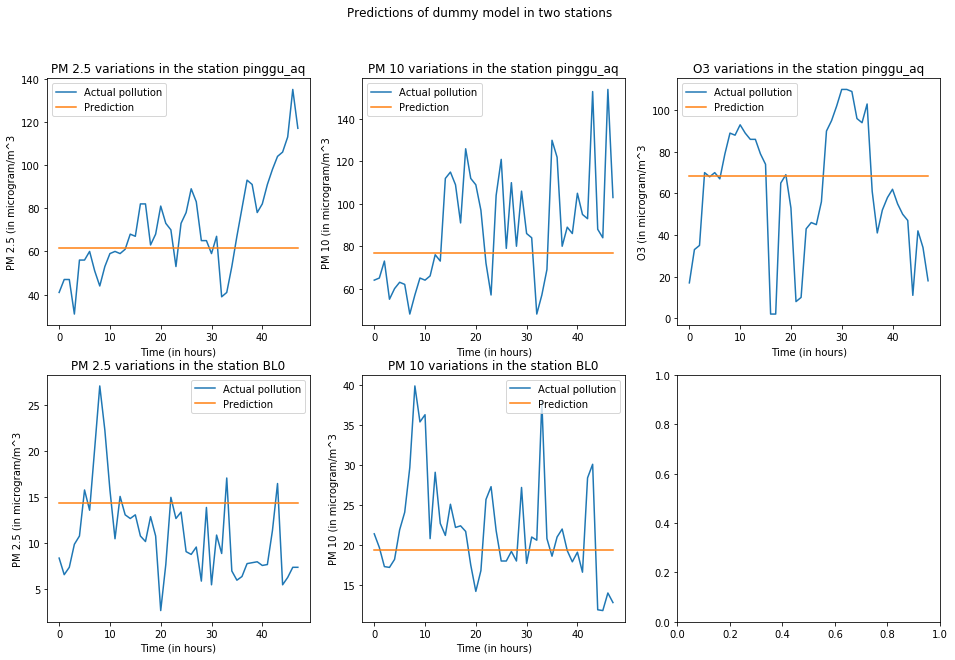

In [1]:
from prediction.compare_predictions import compare_predictions

methods = ['dummy']
for method in methods:
    compare_predictions(method)
